In [2]:
import pandas as pd # Biblioteca usada para acessar DataFrames e gerar estatísticas
import numpy as np # Biblioteca científica p'ra cálculo de média, desvio padrão,
                   # vetores, manipulação de matrizes
from pandas_datareader import data # Carregar dados financeiros on-line (tens de instalar no prompt antes)
import matplotlib.pyplot as plt # Bíbli de vizualização padrão no Python
import seaborn as sbn # Bíbli com gráficos mais avançados e atraentes

In [3]:
ações = ['GOLL4.SA', 'KLBN3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
# Criando uma lista com o nome das ações que serão usadas

In [4]:
ações_df = pd.DataFrame()
for ação in ações: # Criando um loop para percorrer a lista com o nome das ações e obter o resultado
    ações_df[ação] = data.DataReader(name = ação, data_source='yahoo', start='2020-01-01')['Close']
    # ['Close'] no final indica o parâmetro passado para pegar somente a coluna de Fachamento das ações

In [5]:
ações_df = ações_df.rename(columns={'GOLL4.SA':'Gol', 'KLBN3.SA':'Klabin', 'WEGE3.SA':'Wege',
                                    'MGLU3.SA':'Magalu', 'TOTS3.SA':'Totvs', 'BOVA11.SA':'B3'})    
# Renomeando as ações para facilitar a leitura e a digitação

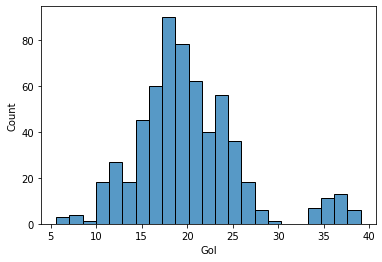

In [6]:
sbn.histplot(ações_df['Gol']);
# Mostrando a freqüência do preço (quantas vezes tal preço aparece) gràficamente
# Para a mensagem <AxesSubplot:xlabel='Gol', ylabel='Count'> é só colocar um ponto-e-vírgula no final
# bins= define o número de barras de freqüência
# Não é obrigatório colocar 'bins' no final

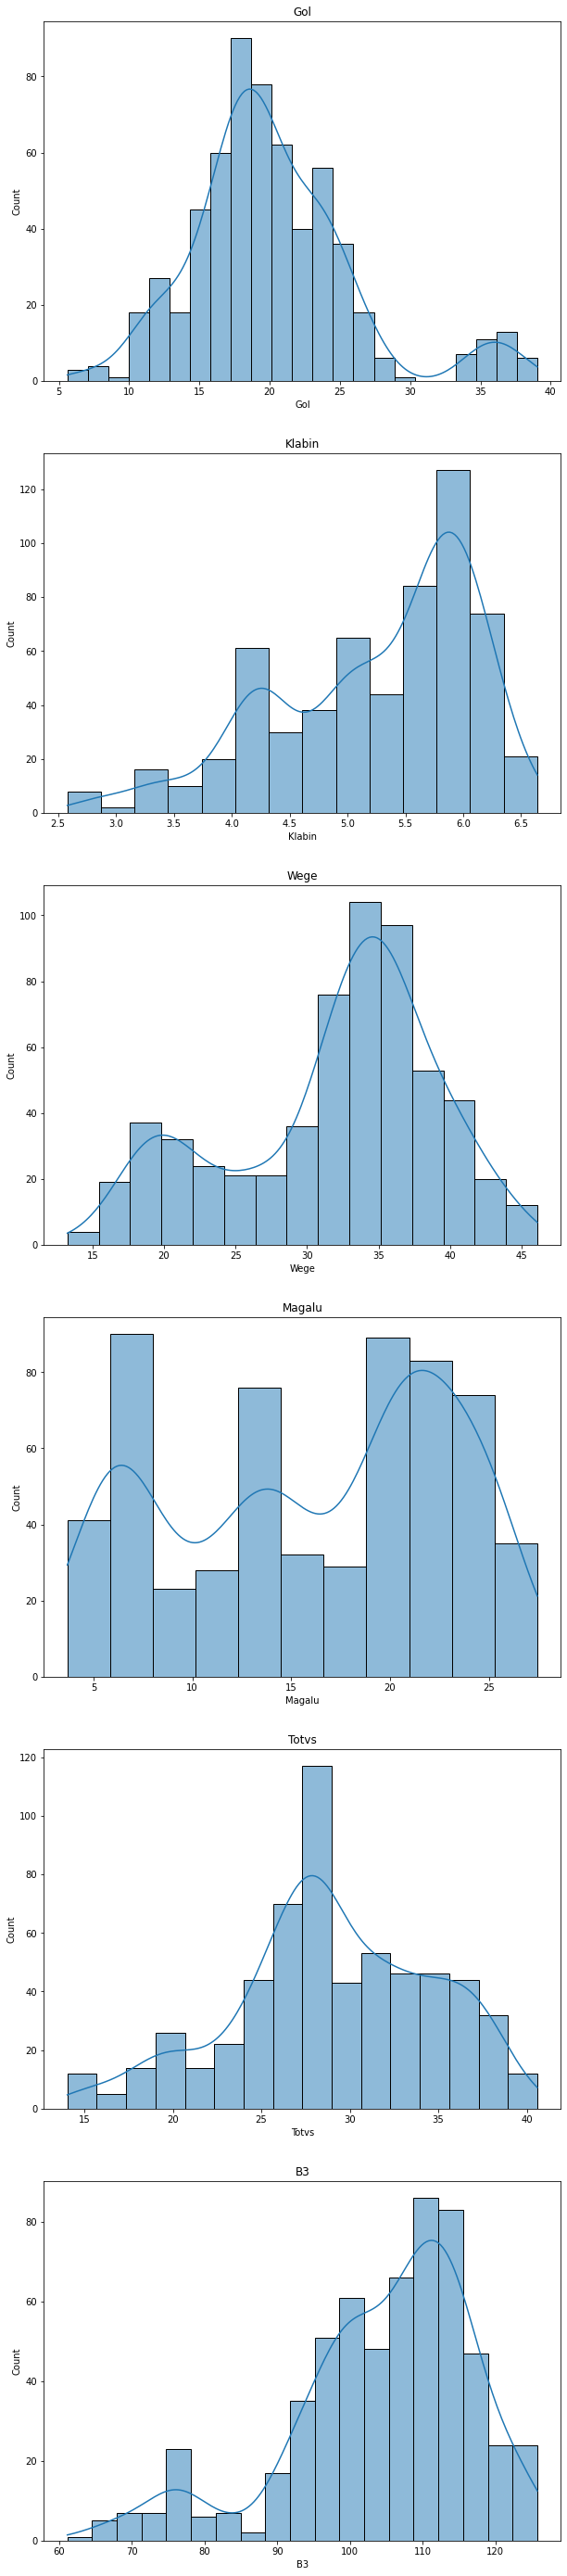

In [7]:
plt.figure(figsize=(10,50))
# Dizendo para o PyPlot que isto é uma figura
# Passando qual será o tamanho da imagem

i=0
# Identificando a partir de qual coluna quero que seja mostrado
# N'êste caso a partir da primeira coluna mesmo

for i in np.arange(0, len(ações_df.columns)):
    # Chamando o NumPy para acessar as colunas em forma de array
    plt.subplot(6, 1, i+1)
        # Fazendo a definição dos gráficos gerando um sub-gráfico
        # 7 = número de linha
        # 1 = número de colunas (caso colocasse mais, ficaria um gráfico do lado do outro)
        # i+1 = identificador do gráfico, cada gráfico precida d'um identicifador único
    sbn.histplot(ações_df[ações_df.columns[i]], kde=True)
        # Fazendo a plotagem dos gráficos em si
        # kde=True = mostra uma linha de densidade
    plt.title(ações_df.columns[i])
        # Botando um título p'ra cada gráfico